In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/MyDrive/Project-X-Lip-Reading


In [3]:
import pickle
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, MaxPooling3D
from tensorflow.keras.layers import Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam

In [4]:
print(tf.__version__)

2.17.0


In [12]:
with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/X_train.pkl', 'rb') as f:
   X_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/y_train.pkl', 'rb') as f:
   y_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/X_test.pkl', 'rb') as f:
   X_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/y_test.pkl', 'rb') as f:
   y_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/X_val.pkl', 'rb') as f:
   X_val = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/y_val.pkl', 'rb') as f:
   y_val = pickle.load(f)

In [22]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Project-X-Lip-Reading/Model Architecture/Saved Model/3D_CNN_LSTM_scratch.h5")

In [27]:
from tensorflow.keras.optimizers import Adam

# Define a new optimizer
optimizer = Adam()

# Compile the model with the new optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [28]:
# Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d_3 (Conv3D)                    │ (None, 26, 98, 98, 32)      │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_3 (MaxPooling3D)       │ (None, 13, 49, 49, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_4 (Conv3D)                    │ (None, 11, 47, 47, 64)      │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_4 (MaxPooling3D)       │ (None, 5, 23, 23, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_5 (Conv3D)                    │ (None, 3, 21, 21, 128)      │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_5 (MaxPooling3D)       │ (None, 1, 10, 10, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 128, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128, 32)             │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2048)                │       8,390,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │          11,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,794,699 (41.18 MB)

 Trainable params: 10,794,699 (41.18 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
X_train.shape

(1040, 28, 100, 100)

In [30]:
y_train.shape


(1040, 11)

In [31]:
# Early Stopping
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor="loss", patience=4)

# Model Training
import time
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size = 32)
t2 = time.time()
print(f"Training time : {t2 - t1} sec")

Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 323ms/step - accuracy: 0.1079 - loss: 3.1110 - val_accuracy: 0.1385 - val_loss: 2.2651
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 269ms/step - accuracy: 0.1433 - loss: 2.3488 - val_accuracy: 0.1462 - val_loss: 2.2726
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 280ms/step - accuracy: 0.1474 - loss: 2.3080 - val_accuracy: 0.2154 - val_loss: 2.1863
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.2285 - loss: 2.1378 - val_accuracy: 0.2846 - val_loss: 1.9368
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 289ms/step - accuracy: 0.2871 - loss: 1.9414 - val_accuracy: 0.3692 - val_loss: 1.6718
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 280ms/step - accuracy: 0.4095 - loss: 1.7151 - val_accuracy: 0.4923 - val_loss: 1.5685
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 281ms/step - accuracy: 0.4680 - loss: 1.5043 - val_accuracy: 0.4462 - val_loss: 1.5952
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 275ms/step - accuracy: 0.5360 - loss: 1.3771 - val_accu

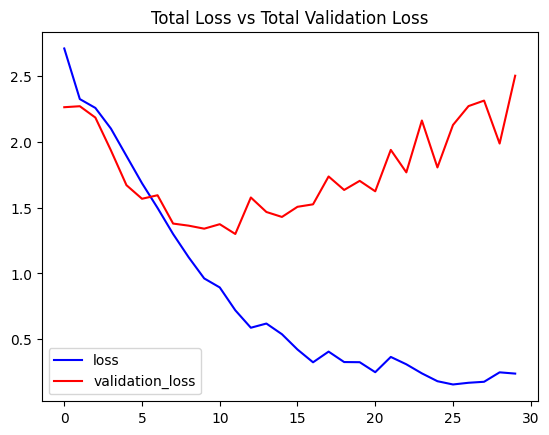

In [32]:
# Visualizing the training and validation loss
plt.plot(history.history['loss'], 'blue', label = 'loss')
plt.plot(history.history['val_loss'], 'red', label = 'validation_loss')
plt.title("Total Loss vs Total Validation Loss")
plt.legend()
plt.show()

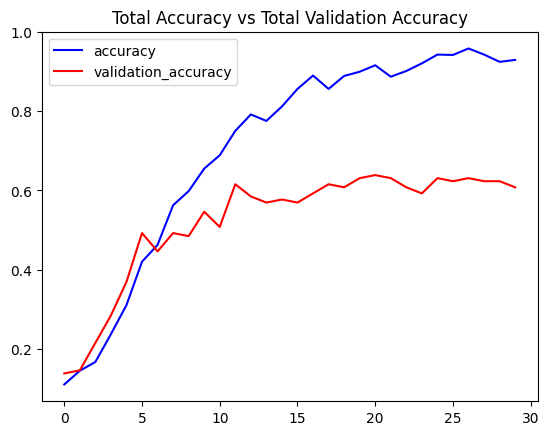

In [33]:
# Visualizing the training and validation accuracy
plt.plot(history.history['accuracy'], 'blue', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'red', label = 'validation_accuracy')
plt.title("Total Accuracy vs Total Validation Accuracy")
plt.legend()
plt.show()

In [34]:
# Model Evaluation
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6626 - loss: 1.7519 
Test Accuracy: 60.77%


In [35]:
scores = model.evaluate(X_val, y_val, verbose=1)
print("Validation Accuracy: %.2f%%" % (scores[1]*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6236 - loss: 2.3191 
Validation Accuracy: 60.77%


In [36]:
scores = model.evaluate(X_train, y_train, verbose=1)
print("Train Accuracy: %.2f%%" % (scores[1]*100))

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9735 - loss: 0.0773
Train Accuracy: 97.31%


In [38]:
model.save_weights('/content/drive/MyDrive/Project-X-Lip-Reading/Model Architecture/Saved Model/3D_CNN_LSTM.weights.h5')

In [39]:
model.load_weights('/content/drive/MyDrive/Project-X-Lip-Reading/Model Architecture/Saved Model/3D_CNN_LSTM.weights.h5')

In [ ]:
# Save the model in HDF5 format
# model.save('/content/drive/MyDrive/Project-X-Lip-Reading/Model Architecture/Saved Model/3D_CNN_LSTM_words_2_10.h5')

In [ ]:
# Load the model
# loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Project-X-Lip-Reading/Model Architecture/Saved Model/3D_CNN_LSTM_words_2_10.h5')